In [144]:
# !pip install navec
# !pip install -U sentence-transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
genre_mapping = {'0ef0aa70-f86c-4141-8054-8b39af97867d': 'Biography',
                '287a1485-7a88-4c2f-bc94-ca418b6c47a1': 'Cartoons',
                '66fad8c3-d84f-458d-a8bf-5b4f154969e0': 'Show',
                '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Theater',
                '9fa28b61-a257-4a3e-945b-a9ef76a146d6': 'Fantasy',
                'b0836a1d-635f-4d89-bcc5-25d10ba56642': 'Anime',
                'd7214feb-8c11-4aea-aabb-ac98a8d56fd5': 'History',
                'dc65dbc8-34ba-4df1-b32c-4f895e10bff8': 'Shorts',
                'eb001d27-5be3-4d42-9d88-90d593f2627d': 'War_movies',
                '364fdc2e-bdfe-40be-b2c5-d30f43ec432e': 'Crime',
                '1f22ccf1-288a-4e6e-b39a-7502799e7125': 'Лекции',
                '6d640e04-be3a-4c8c-852e-4e9b12449d5d': 'Концерты',
                '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Театр',
                '2f7908cc-e2fd-43cf-b626-ec1aef436160': 'Курсы'}

In [36]:
# actor director ?

In [37]:
with open('./item_coldstart_dataset.pkl', 'rb') as f:
    df = pickle.load(f)

In [38]:
df.columns

Index(['actor', 'age_access_type', 'country', 'average_rating', 'duration',
       'availability', 'type', 'name', 'release_year', 'genre', 'director',
       'target', 'subscription_only', 'uid'],
      dtype='object')

In [46]:
df.drop([2408, 2446], axis=0, inplace=True)

# EDA

In [47]:
# Nans
df.isnull().sum()

actor                  0
age_access_type        0
country                0
average_rating       555
duration               0
availability         148
type                   0
name                   0
release_year           0
genre                  0
director               0
target                 0
subscription_only      0
uid                    0
dtype: int64

## Mutlivalue categorical features

In [16]:
def plot_bar(bar_info, title=''):
    plt.title(title)
    sns.barplot(y=bar_info.values, x=bar_info.index)
    plt.show()

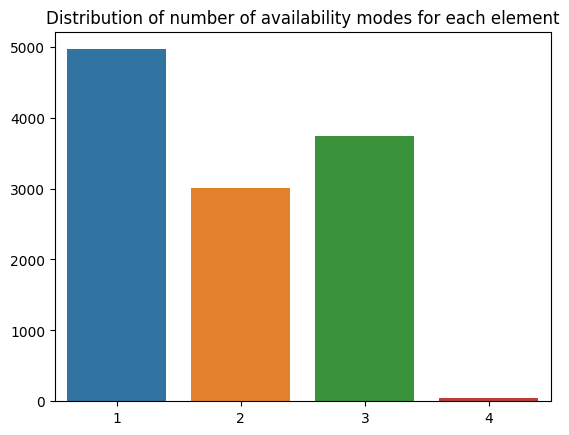

In [17]:
availability_num = pd.Series([len(value) for value in df['availability'].dropna()])
bar_info = availability_num.value_counts().sort_values()

plot_bar(bar_info, 'Distribution of number of availability modes for each element')

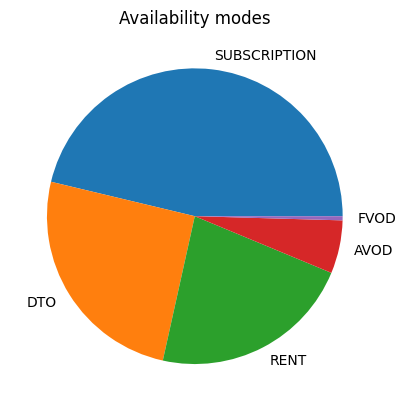

In [54]:
all_avail_modes = []
for element in df['availability'].dropna():
    all_avail_modes.extend(element)
avail_modes_count = pd.Series(all_avail_modes).value_counts()
plt.pie(avail_modes_count.values, labels=avail_modes_count.index)
plt.title('Availability modes')
plt.show()

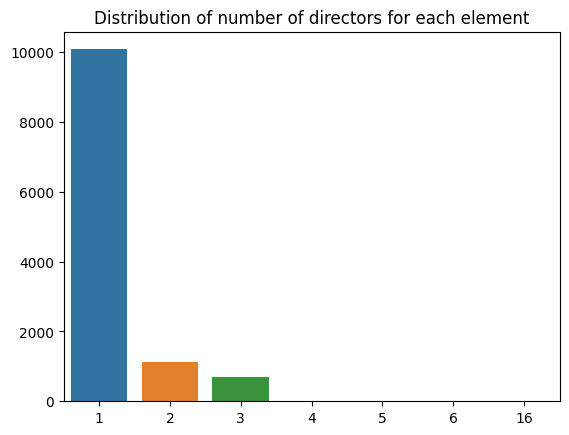

In [19]:
directors_num = pd.Series([len(value) for value in df['director']])
bar_info = directors_num.value_counts().sort_values()

plot_bar(bar_info, 'Distribution of number of directors for each element')

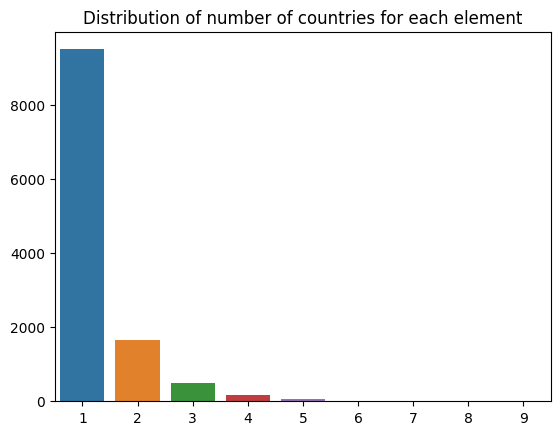

In [20]:
countries_num = pd.Series([len(value) for value in df['country']])
bar_info = countries_num.value_counts().sort_values()

plot_bar(bar_info, 'Distribution of number of countries for each element')

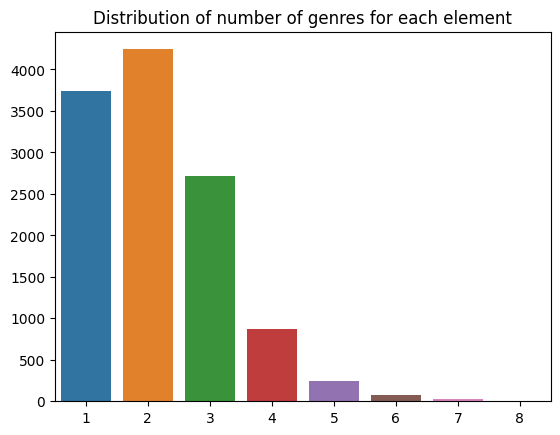

In [21]:
genres_num = pd.Series([len(value) for value in df['genre']])
bar_info = genres_num.value_counts().sort_values()

plot_bar(bar_info, 'Distribution of number of genres for each element')

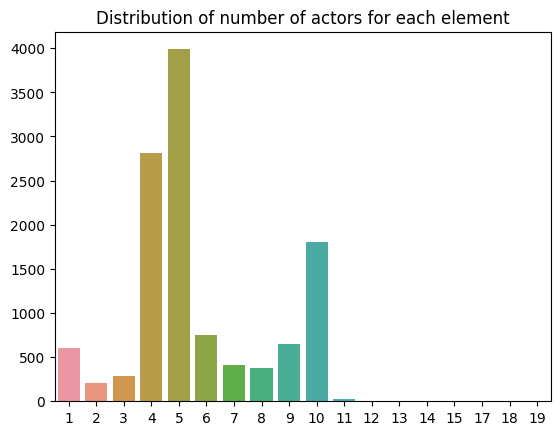

In [22]:
genres_num = pd.Series([len(value) for value in df['actor']])
bar_info = genres_num.value_counts().sort_values()

plot_bar(bar_info, 'Distribution of number of actors for each element')

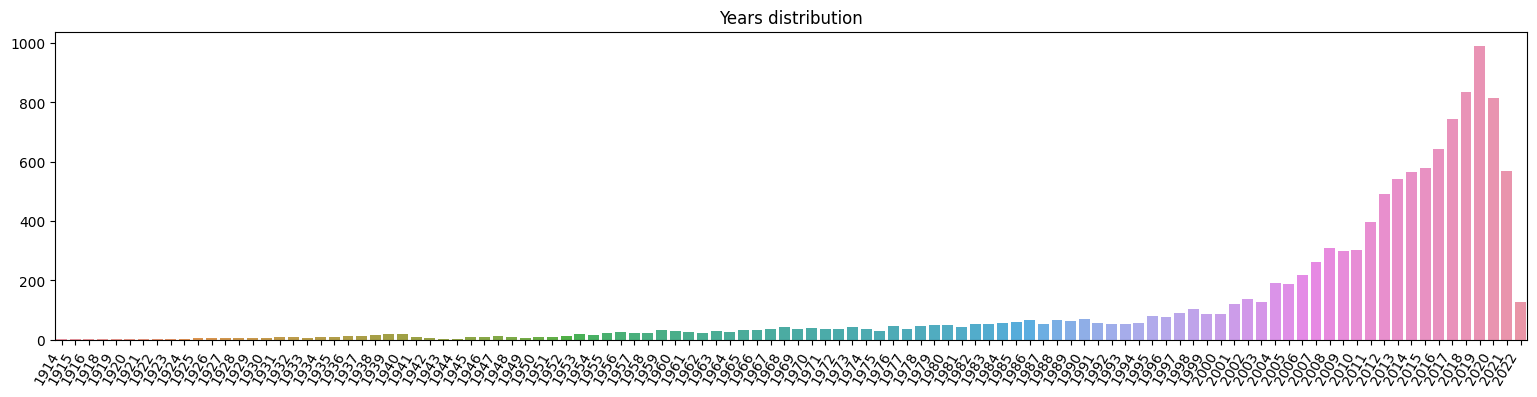

In [53]:
bar_info = df['release_year'].astype(int).value_counts()
bar_info = [(i, v) for i, v in zip(bar_info.index, bar_info.values)]
bar_info = sorted(bar_info, key=lambda x: x[0])

plt.figure(figsize=(19, 4))
chart = sns.barplot(y=[v[1] for v in bar_info], x=[v[0] for v in bar_info])
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.title('Years distribution')
plt.show()

## Numeric

In [24]:
def plot_dictribution(feature, title=''):
    plt.figure(figsize=(12, 3)) 
    sns.distplot(feature)
    plt.title(title)
    plt.show()

    plt.figure(figsize=(12, 3))
    sns.boxplot(feature, orient='h')
    plt.show()

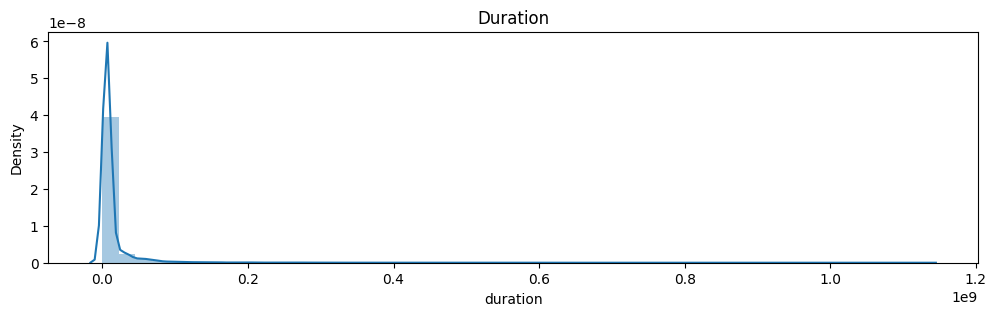

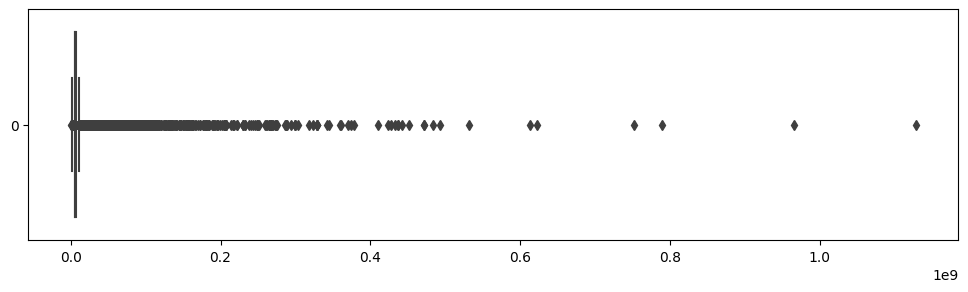

In [25]:
plot_dictribution(df['duration'], 'Duration')

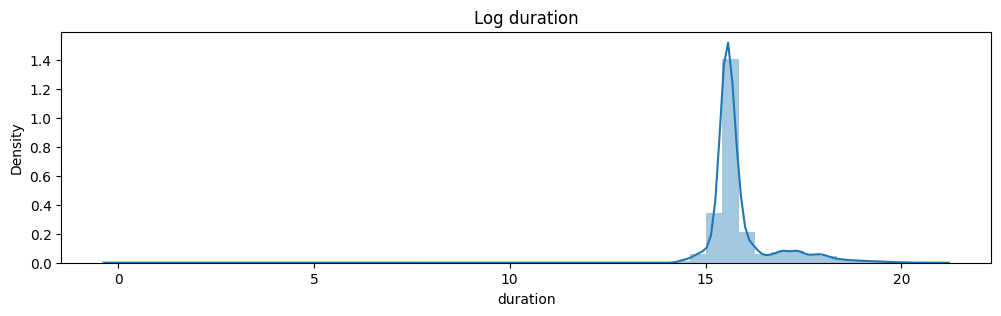

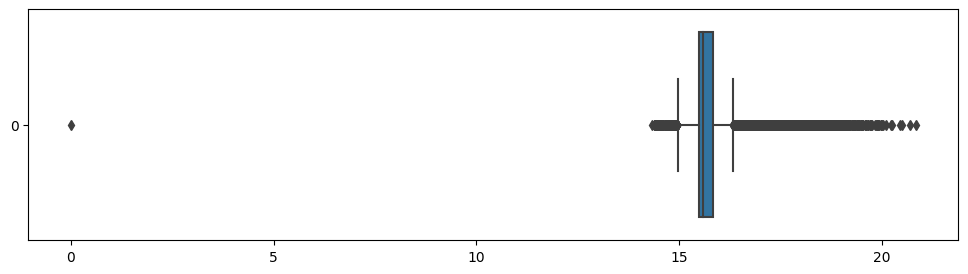

In [26]:
log_duration = df['duration'].apply(lambda x: np.log1p(x))

plot_dictribution(log_duration, 'Log duration')

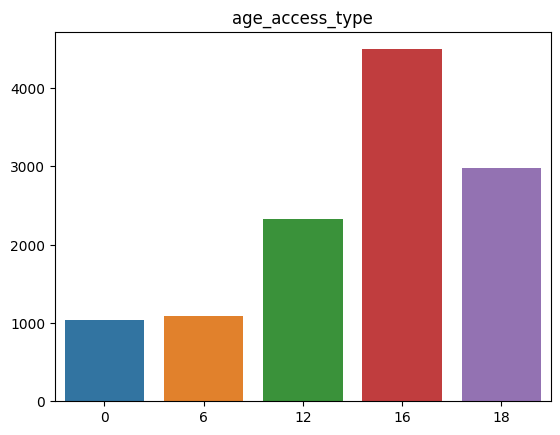

In [27]:
bar_info = df['age_access_type'].value_counts()

plot_bar(bar_info, 'age_access_type')

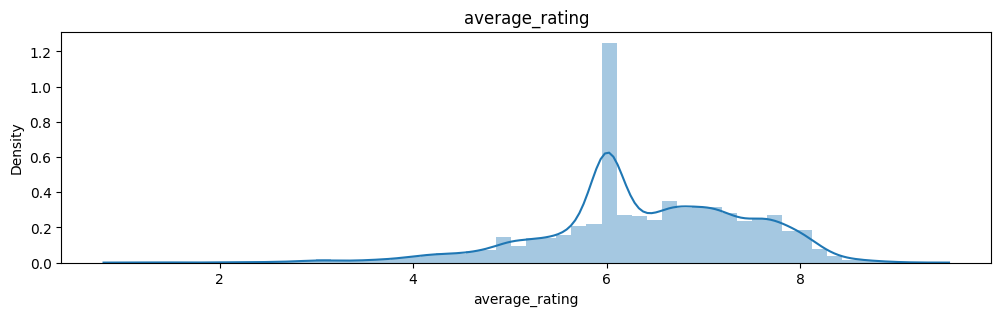

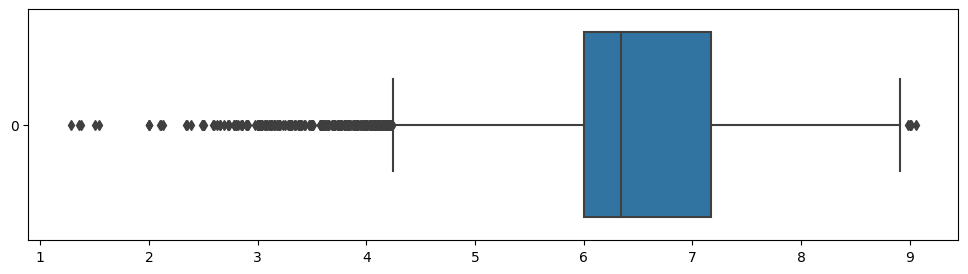

In [28]:
plot_dictribution(df['average_rating'], 'average_rating')

# Multivariate

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11917 entries, 0 to 11918
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   actor              11917 non-null  object 
 1   age_access_type    11917 non-null  object 
 2   country            11917 non-null  object 
 3   average_rating     11362 non-null  object 
 4   duration           11917 non-null  object 
 5   availability       11769 non-null  object 
 6   type               11917 non-null  object 
 7   name               11917 non-null  object 
 8   release_year       11917 non-null  object 
 9   genre              11917 non-null  object 
 10  director           11917 non-null  object 
 11  target             11917 non-null  float64
 12  subscription_only  11917 non-null  object 
 13  uid                11917 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.6+ MB


In [31]:
df.columns

Index(['actor', 'age_access_type', 'country', 'average_rating', 'duration',
       'availability', 'type', 'name', 'release_year', 'genre', 'director',
       'target', 'subscription_only', 'uid'],
      dtype='object')

In [48]:
num_features = ['age_access_type', 'average_rating', 'duration', 'release_year',
       'target']
df[num_features] = df[num_features].astype(float)

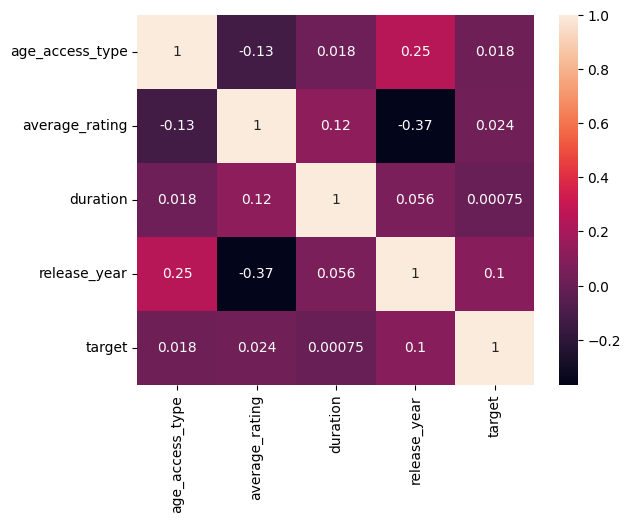

In [51]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# Preprocessing

In [29]:
df.shape

(11917, 14)

In [30]:
df.head()

actor age_access_type country  \
0  [cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 21c7a45...              12   [usa]   
1  [cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 21c7a45...              16   [usa]   
2  [cff3362f-ad91-498d-80b3-ea3ab8ec65cf, bcad17e...              18   [usa]   
3  [cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 30dd19c...              18   [usa]   
4  [cff3362f-ad91-498d-80b3-ea3ab8ec65cf, a805fdd...              18   [usa]   

  average_rating duration               availability   type  \
0           6.21  6420000  [DTO, RENT, SUBSCRIPTION]  MOVIE   
1            7.2  6780000  [DTO, RENT, SUBSCRIPTION]  MOVIE   
2            4.0  6000000  [DTO, RENT, SUBSCRIPTION]  MOVIE   
3           6.99  3780000             [SUBSCRIPTION]  MOVIE   
4            6.0  3780000             [SUBSCRIPTION]  MOVIE   

                                 name release_year  \
0    Звёздный путь 5: Последний рубеж         1989   
1  Звёздный путь 6: Неоткрытая страна         1991   
2        В поисках древнего артефакта         2019   
3                 Прожарка Чарли Шина         2011   
4            Прожарка Уильяма Шэтнера         2006   

                                   genre  \
0  [Sci-Fi, Action, Thriller, Adventure]   
1  [Sci-Fi, Action, Thriller, Adventure]   
2                               [Horror]   
3                  [Comedy, Documentary]   
4                               [Comedy]   

                                 director        target subscription_only  \
0  [cff3362f-ad91-498d-80b3-ea3ab8ec65cf]  8.508657e-07             False   
1  [bab6b7f4-4506-458f-9091-d567505674f2]  1.559920e-06             False   
2  [895f5774-964a-4c5a-ae22-d697d3e3e620]  3.578051e-06             False   
3  [1de22aff-430e-4af9-bf1d-159dbf8e9269]  3.544765e-04              True   
4  [1de22aff-430e-4af9-bf1d-159dbf8e9269]  6.394210e-05              True   

                                    uid  
0  e785baa6-f175-42b4-9e16-4319ac7991d5  
1  4593737e-de9c-40df-97db-fb3cf85a08ef  
2  11ba66db-e941-4c3a-8da6-d8900e56f8c7  
3  3f30a2ef-53b7-40e3-954f-1bdfc38a6d17  
4  cdfa700f-122d-41e5-b8dc-9c6813bab6d2

In [31]:
df.columns

Index(['actor', 'age_access_type', 'country', 'average_rating', 'duration',
       'availability', 'type', 'name', 'release_year', 'genre', 'director',
       'target', 'subscription_only', 'uid'],
      dtype='object')

In [32]:
mltpl_cat_features = ['actor', 'country', 'genre', 'director']
cat_features = ['availability']
cat_features_raw = ['type', 'subscription_only']
num_features = ['age_access_type', 'average_rating', 'duration', 'release_year']
skewed_num_features = ['duration']
text_features = ['name']
mltpl_cat_n_top = {'actor': 5, 'country': 1, 'genre': 3, 'director': 1}

class Preprocesser:
    def __init__(self, 
                mulpiple_cat_features: list,
                skewed_num_features: list,
                text_features: list,
                cat_features: list,
                mltpl_cat_n_top: dict):
        self.mulpiple_cat_features = mulpiple_cat_features
        self.skewed_num_features = skewed_num_features
        self.text_features = text_features
        self.mltpl_cat_n_top = mltpl_cat_n_top
        self.cat_features = cat_features
       # self.release_year_feature = release_year_feature
        
    def __get_top_n_mltpl_cat_features(self, df_pr, col):
        all_cats = []
        for element_values in df_pr[col]:
            all_cats.extend(element_values)
        return Counter(all_cats).most_common(self.mltpl_cat_n_top[col])
            
    def __preprocess_mulpiple_cat_features(self, df_pr):
        for col in self.mulpiple_cat_features:
            feature_number = self.mltpl_cat_n_top[col]
            df_pr[[f'{col}_{i}' for i in range(feature_number)]] = pd.DataFrame(np.full((len(df), feature_number), np.nan))
            for i in df_pr.index:
                names = df_pr.loc[i, col]
                for k, name in enumerate(names[:int(feature_number)]):
                    df_pr.loc[i, f'{col}_{k}'] = name
            df_pr.drop(col, axis=1, inplace=True)

        return df_pr
    
    def __preprocess_skewed_num_features(self, df_pr):
        for col in self.skewed_num_features:
            df_pr[col] = df_pr[col].apply(lambda x: np.log1p(x))
        return df_pr
    
    def __preprocess_text_features(self, df_pr):
        for col in self.text_features:
            df_pr[[f'{col}_{i}' for i in range(768)]] = self.embed_model.encode(df_pr[col].values)
            df_pr.drop(col, axis=1, inplace=True)
        return df_pr
    
    def __get_unique_values(self, feature):
        unique_values = []
        for element in feature.dropna():
            unique_values.extend(element)
        return set(unique_values)
    
    def __preprocess_cat_features(self, df_pr):
        for col in self.cat_features:
            unique_values = self.__get_unique_values(df_pr[col])
            cats_df = pd.DataFrame(np.full((len(df_pr), len(unique_values)),
                                            0),
                                   columns=list(unique_values))
            
            for i, element in enumerate(df_pr[col]):
                if isinstance(element, float):
                    cats_df.loc[i, :] = 'Na'
                    continue
                for value in element:
                    cats_df.loc[i, value] = '1'
            df_pr.drop(col, axis=1, inplace=True)
        df_pr[cats_df.columns] = cats_df
        return df_pr  
            
    def preprocess(self,
                   df: pd.DataFrame):
        df_pr = df.copy()
        df_pr = self.__preprocess_mulpiple_cat_features(df_pr)
        df_pr = self.__preprocess_skewed_num_features(df_pr)
        df_pr = self.__preprocess_cat_features(df_pr)
        
        return df_pr
        
        
class TargetTransformer:
    def __init__(self, denominator=1):
        self.scale = denominator
        
    def inverse_transform(self, feature):
        return feature.apply(lambda x: np.expm1(x))
    
    def transform(self, feature):
        return feature.apply(lambda x: np.log1p(x))

In [33]:
preprocesser = Preprocesser(mltpl_cat_features,
            skewed_num_features,
            text_features,
            cat_features,
            mltpl_cat_n_top)

target_transformer = TargetTransformer()

In [34]:
df.columns

Index(['actor', 'age_access_type', 'country', 'average_rating', 'duration',
       'availability', 'type', 'name', 'release_year', 'genre', 'director',
       'target', 'subscription_only', 'uid'],
      dtype='object')

In [36]:
df_modern = df[df['release_year'] >= 2000]
df_short = df_modern[df_modern['target'] < 0.02]
df_short.reset_index(drop=True, inplace=True)
df_pr = preprocesser.preprocess(df_short)

df_pr['release_year'] = df_pr['release_year'].astype(str)
df_pr['average_rating'] = df_pr['average_rating'].astype(float)
df_pr['age_access_type'] = df_pr['age_access_type'].astype(int)
df_pr['subscription_only'] = df_pr['subscription_only'].apply(int).astype(str)

df_pr['unified_id'] = df['uid']

In [51]:
df_pr.columns

Index(['age_access_type', 'average_rating', 'duration', 'type', 'name',
       'release_year', 'target', 'subscription_only', 'uid', 'actor_0',
       'actor_1', 'actor_2', 'actor_3', 'actor_4', 'country_0', 'genre_0',
       'genre_1', 'genre_2', 'director_0', 'RENT', 'AVOD', 'DTO',
       'SUBSCRIPTION', 'unified_id'],
      dtype='object')

In [37]:
cat_features = ['type', 'subscription_only', 'actor_0', 'actor_1',
               'actor_2', 'actor_3', 'actor_4', 'country_0', 'genre_0', 'genre_1',
               'genre_2', 'director_0', 'SUBSCRIPTION', 'AVOD', 'DTO', 'FVOD', 'RENT']
num_features = ['age_access_type', 'average_rating', 'duration', 'release_year']

In [38]:
df_pr.head()

age_access_type  average_rating   duration   type  \
0               18            4.00  15.607270  MOVIE   
1               18            6.99  15.145235  MOVIE   
2               18            6.00  15.145235  MOVIE   
3                0            6.21  15.396549  MOVIE   
4                6            6.40  15.523889  MOVIE   

                           name release_year    target subscription_only  \
0  В поисках древнего артефакта         2019  0.000004                 0   
1           Прожарка Чарли Шина         2011  0.000354                 1   
2      Прожарка Уильяма Шэтнера         2006  0.000064                 1   
3           Большое путешествие         2006  0.000003                 1   
4              Пламенное сердце         2022  0.009705                 1   

                                    uid                               actor_0  \
0  11ba66db-e941-4c3a-8da6-d8900e56f8c7  cff3362f-ad91-498d-80b3-ea3ab8ec65cf   
1  3f30a2ef-53b7-40e3-954f-1bdfc38a6d17  cff3362f-ad91-498d-80b3-ea3ab8ec65cf   
2  cdfa700f-122d-41e5-b8dc-9c6813bab6d2  cff3362f-ad91-498d-80b3-ea3ab8ec65cf   
3  d8b55146-dee5-4498-957c-5614414b48fb  cff3362f-ad91-498d-80b3-ea3ab8ec65cf   
4  ba6bec1a-3aa9-48c7-aa65-908c21627a12  cff3362f-ad91-498d-80b3-ea3ab8ec65cf   

   ... genre_0                               genre_1 genre_2  \
0  ...  Horror                                   NaN     NaN   
1  ...  Comedy                           Documentary     NaN   
2  ...  Comedy                                   NaN     NaN   
3  ...  Family  287a1485-7a88-4c2f-bc94-ca418b6c47a1     NaN   
4  ...  Comedy                             Adventure  Family   

                             director_0 RENT AVOD FVOD DTO SUBSCRIPTION  \
0  895f5774-964a-4c5a-ae22-d697d3e3e620    1    0    0   1            1   
1  1de22aff-430e-4af9-bf1d-159dbf8e9269    0    0    0   0            1   
2  1de22aff-430e-4af9-bf1d-159dbf8e9269    0    0    0   0            1   
3  fe598c84-ef4f-47c7-91af-d5cbd89c4e8d    0    0    0   0            1   
4  40f78e6d-3c9f-434f-a505-c6ffdd045763    0    0    0   0            1   

                             unified_id  
0  e785baa6-f175-42b4-9e16-4319ac7991d5  
1  4593737e-de9c-40df-97db-fb3cf85a08ef  
2  11ba66db-e941-4c3a-8da6-d8900e56f8c7  
3  3f30a2ef-53b7-40e3-954f-1bdfc38a6d17  
4  cdfa700f-122d-41e5-b8dc-9c6813bab6d2  

[5 rows x 25 columns]

In [39]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9483 entries, 0 to 9482
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age_access_type    9483 non-null   int64  
 1   average_rating     8958 non-null   float64
 2   duration           9483 non-null   float64
 3   type               9483 non-null   object 
 4   name               9483 non-null   object 
 5   release_year       9483 non-null   object 
 6   target             9483 non-null   float64
 7   subscription_only  9483 non-null   object 
 8   uid                9483 non-null   object 
 9   actor_0            9483 non-null   object 
 10  actor_1            8911 non-null   object 
 11  actor_2            8740 non-null   object 
 12  actor_3            8509 non-null   object 
 13  actor_4            6078 non-null   object 
 14  country_0          9483 non-null   object 
 15  genre_0            9483 non-null   object 
 16  genre_1            6520 

In [40]:
df_pr.isnull().sum()

age_access_type         0
average_rating        525
duration                0
type                    0
name                    0
release_year            0
target                  0
subscription_only       0
uid                     0
actor_0                 0
actor_1               572
actor_2               743
actor_3               974
actor_4              3405
country_0               0
genre_0                 0
genre_1              2963
genre_2              6320
director_0              0
RENT                    0
AVOD                    0
FVOD                    0
DTO                     0
SUBSCRIPTION            0
unified_id              2
dtype: int64

In [41]:
df_pr[cat_features] = df_pr[cat_features].replace(np.nan, 'Na')

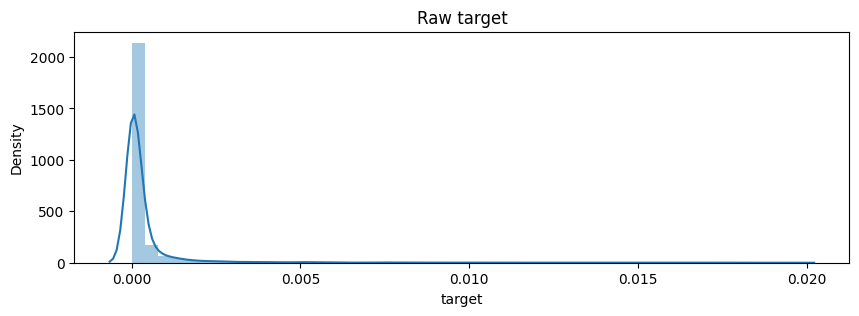

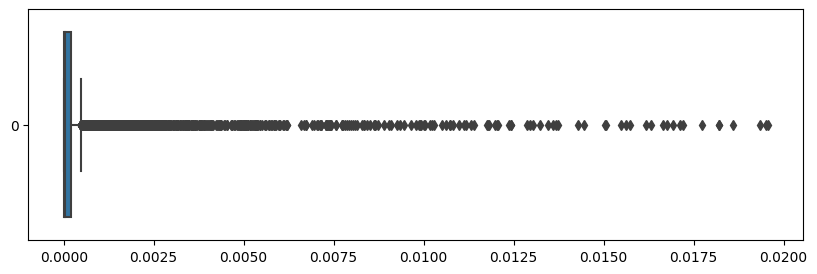

In [42]:
plt.figure(figsize=(10, 3))
sns.distplot(df_pr['target'].apply(lambda x: np.log1p(x)))
plt.title('Raw target')
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(df_pr['target'].apply(lambda x: np.log1p(x)), orient='h')
plt.show()

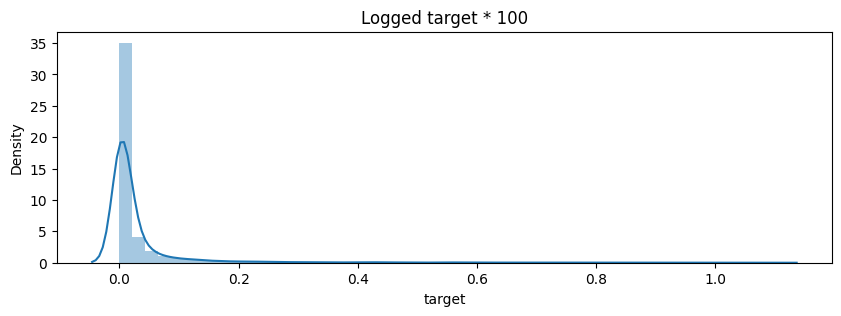

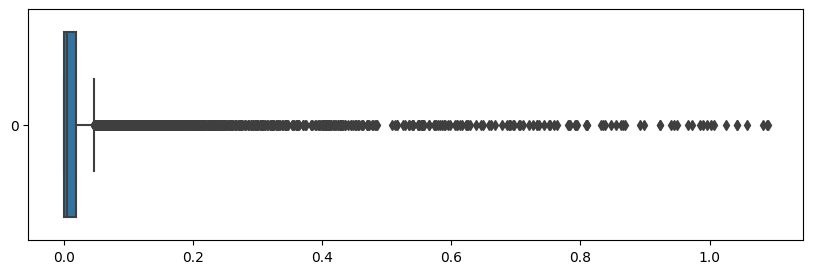

In [43]:
MULTIPLIER = 100
X, y = df_pr.drop('target', axis=1), df_pr['target'] * MULTIPLIER
y = target_transformer.transform(y)

plt.figure(figsize=(10, 3))
sns.distplot(y)
plt.title('Logged target * 100')
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(y, orient='h')
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42, shuffle=True)

In [45]:
X_train.columns

Index(['age_access_type', 'average_rating', 'duration', 'type', 'name',
       'release_year', 'subscription_only', 'uid', 'actor_0', 'actor_1',
       'actor_2', 'actor_3', 'actor_4', 'country_0', 'genre_0', 'genre_1',
       'genre_2', 'director_0', 'RENT', 'AVOD', 'FVOD', 'DTO', 'SUBSCRIPTION',
       'unified_id'],
      dtype='object')

In [46]:
df_pr

age_access_type  average_rating   duration    type  \
0                  18            4.00  15.607270   MOVIE   
1                  18            6.99  15.145235   MOVIE   
2                  18            6.00  15.145235   MOVIE   
3                   0            6.21  15.396549   MOVIE   
4                   6            6.40  15.523889   MOVIE   
...               ...             ...        ...     ...   
9478               16            7.60  18.121735  SERIAL   
9479               18             NaN  17.184185  SERIAL   
9480               16            7.80  17.627492  SERIAL   
9481               16             NaN  16.358686  SERIAL   
9482                0            6.30   0.000000  SERIAL   

                                   name release_year    target  \
0          В поисках древнего артефакта         2019  0.000004   
1                   Прожарка Чарли Шина         2011  0.000354   
2              Прожарка Уильяма Шэтнера         2006  0.000064   
3                   Большое путешествие         2006  0.000003   
4                      Пламенное сердце         2022  0.009705   
...                                 ...          ...       ...   
9478          Учёный, гуляющий по ночам         2015  0.000085   
9479  Милые обманщицы: Первородный грех         2022  0.000696   
9480          Пропавшие: Другая сторона         2020  0.000652   
9481                          Тиндер-80         2020  0.001266   
9482                            Царевны         2018  0.000786   

     subscription_only                                   uid  \
0                    0  11ba66db-e941-4c3a-8da6-d8900e56f8c7   
1                    1  3f30a2ef-53b7-40e3-954f-1bdfc38a6d17   
2                    1  cdfa700f-122d-41e5-b8dc-9c6813bab6d2   
3                    1  d8b55146-dee5-4498-957c-5614414b48fb   
4                    1  ba6bec1a-3aa9-48c7-aa65-908c21627a12   
...                ...                                   ...   
9478                 0  f4b8a993-5d91-41f4-b5fb-3769a73d4b53   
9479                 1  673a98a8-5d12-4a3d-9c50-d1d196a8fd96   
9480                 0  37305c51-cb1e-4ff2-b5ad-3425ed73b17a   
9481                 1  249b3db3-8dbd-4a18-bd4b-5d0cc08878c4   
9482                 0  ca50fd7c-41c5-4208-9f72-06d78fc602b5   

                                   actor_0  ...  \
0     cff3362f-ad91-498d-80b3-ea3ab8ec65cf  ...   
1     cff3362f-ad91-498d-80b3-ea3ab8ec65cf  ...   
2     cff3362f-ad91-498d-80b3-ea3ab8ec65cf  ...   
3     cff3362f-ad91-498d-80b3-ea3ab8ec65cf  ...   
4     cff3362f-ad91-498d-80b3-ea3ab8ec65cf  ...   
...                                    ...  ...   
9478  d47abe6d-d856-40cc-877b-395072f26804  ...   
9479  d3ac2bba-c855-40b1-98ed-5a360484846c  ...   
9480  40977851-22fb-4829-8c01-d73acaa39ffe  ...   
9481  8f485b8e-48f3-4d18-80fa-6fbaa7838b10  ...   
9482  0ff8332b-9669-4337-a78c-fce4956c3be0  ...   

                                   genre_0  \
0                                   Horror   
1                                   Comedy   
2                                   Comedy   
3                                   Family   
4                                   Comedy   
...                                    ...   
9478                                Action   
9479                              Thriller   
9480                              Thriller   
9481                                Comedy   
9482  287a1485-7a88-4c2f-bc94-ca418b6c47a1   

                                   genre_1  \
0                                       Na   
1                              Documentary   
2                                       Na   
3     287a1485-7a88-4c2f-bc94-ca418b6c47a1   
4                                Adventure   
...                                    ...   
9478                             Melodrama   
9479                             Melodrama   
9480                             Detective   
9481                                    Na   
9482                                    Na   

    

In [47]:
df_pr.drop('FVOD', axis=1, inplace=True)

In [49]:
# with open('/home/jovyan/work/cold_start_models/dataset_0.pkl', 'wb') as f:
#     pickle.dump(df_pr, f)

# with open('dataset_1.pkl', 'rb') as f:
#     df_pr = pickle.load(f)

# with open('item_coldstart_dataset_with_names.pkl', 'wb') as f:
    # pickle.dump(df_pr, f)

# with open('item_coldstart_dataset_with_names.pkl', 'rb') as f:
#     df_pr = pickle.load(f)

# Modeling

In [23]:
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error as mae, r2_score as r2
from scipy.stats import uniform, randint

In [24]:
def get_metrics(y_test, y_pred, X):
    y_test = target_transformer.inverse_transform(y_test) / MULTIPLIER
    y_pred = target_transformer.inverse_transform(pd.Series(y_pred)) / MULTIPLIER

    print('MAE', mae(y_test, y_pred))
    print('R2', r2(y_test, y_pred))
    print('Adj R2', 1 - (1-r2(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1))
    

def get_importance(train_dataset, cat_model, title='Catboost feature importance', save_fig=False, file_name='cat_feature_importance.png'):
    imp = cat_model.get_feature_importance(data=train_dataset)
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.barh(width=imp, y=cat_model.feature_names_)
    axes.set_title(title)
    if save_fig:
        plt.savefig(file_name)
    plt.show()
    

def draw_target_distr(y_test, y_pred, save_fig=False, file_name='cat_distribution'):
    plt.figure(figsize=(12, 5))
    sns.distplot(y_test)
    sns.distplot(y_pred)
    plt.legend(['test', 'pred'])
    if save_fig:
        plt.savefig(file_name)
    plt.show()

    
def draw_residuals(y_test, y_pred, save_fig=False,
                   file_name='cat_residuals.png'):
    y_test = target_transformer.inverse_transform(y_test)
    y_pred = target_transformer.inverse_transform(pd.Series(y_pred))  / MULTIPLIER
    sns.residplot(x=y_test, y=y_pred)
    if save_fig:
        plt.savefig(file_name)
    plt.show()

In [22]:
with open('dataset_1.pkl', 'rb') as f:
    df_pr = pickle.load(f)

# with open('item_coldstart_dataset_with_names.pkl', 'rb') as f:
#     df_pr = pickle.load(f)

In [283]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10197 entries, 0 to 10196
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age_access_type    10197 non-null  int64  
 1   average_rating     9668 non-null   float64
 2   duration           10197 non-null  float64
 3   type               10197 non-null  object 
 4   name               10197 non-null  object 
 5   release_year       10197 non-null  int64  
 6   target             10197 non-null  float64
 7   subscription_only  10197 non-null  object 
 8   actor_0            10197 non-null  object 
 9   actor_1            10197 non-null  object 
 10  actor_2            10197 non-null  object 
 11  actor_3            10197 non-null  object 
 12  actor_4            10197 non-null  object 
 13  country_0          10197 non-null  object 
 14  genre_0            10197 non-null  object 
 15  genre_1            10197 non-null  object 
 16  genre_2            101

In [37]:
cat_features = ['type', 'subscription_only', 'actor_0', 'actor_1',
               'actor_2', 'actor_3', 'actor_4', 'country_0', 'genre_0', 'genre_1',
               'genre_2', 'director_0', 'SUBSCRIPTION', 'AVOD', 'DTO', 'RENT', 'release_year']
num_features = ['age_access_type', 'average_rating', 'duration']

target_transformer = TargetTransformer()

In [38]:
MULTIPLIER = 100
X, y = df_pr.drop(['target', 'name'], axis=1), df_pr['target'] * MULTIPLIER
y = target_transformer.transform(y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42, shuffle=True)
train_dataset = cat.Pool(X_train, y_train,
                         cat_features=cat_features,   
                        ) 
test_dataset = cat.Pool(X_test, y_test,
                         cat_features=cat_features,
                       )
val_dataset = cat.Pool(X_val, y_val,
                       cat_features=cat_features,
                      )

In [287]:
cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features,
    'iterations': 10000, 
}

cat_model = cat.CatBoostRegressor(**cat_params)

cat_model.fit(
    train_dataset,
    eval_set=val_dataset,
    early_stopping_rounds=50,
    verbose=100,
    plot=False
)

Learning rate set to 0.017703
0:	learn: 0.0417066	test: 0.0370348	best: 0.0370348 (0)	total: 12.3ms	remaining: 2m 3s
100:	learn: 0.0330571	test: 0.0295932	best: 0.0295932 (100)	total: 1.05s	remaining: 1m 42s
200:	learn: 0.0302572	test: 0.0273476	best: 0.0273476 (200)	total: 2.18s	remaining: 1m 46s
300:	learn: 0.0292611	test: 0.0268415	best: 0.0268415 (300)	total: 3.27s	remaining: 1m 45s
400:	learn: 0.0287362	test: 0.0265320	best: 0.0265320 (400)	total: 4.34s	remaining: 1m 43s
500:	learn: 0.0284311	test: 0.0263266	best: 0.0263261 (499)	total: 5.39s	remaining: 1m 42s
600:	learn: 0.0281225	test: 0.0261444	best: 0.0261334 (591)	total: 6.48s	remaining: 1m 41s
700:	learn: 0.0278130	test: 0.0260076	best: 0.0260076 (700)	total: 7.57s	remaining: 1m 40s
800:	learn: 0.0275766	test: 0.0257613	best: 0.0257543 (797)	total: 8.68s	remaining: 1m 39s
900:	learn: 0.0274058	test: 0.0255778	best: 0.0255776 (891)	total: 9.79s	remaining: 1m 38s
1000:	learn: 0.0272094	test: 0.0254240	best: 0.0254226 (998)	tot

In [288]:
cat_model.save_model('views_0_cat')

In [289]:
y_pred = cat_model.predict(X_test)

In [307]:
get_metrics(y_test, y_pred, X)

MAE 0.032349631636097775
R2 0.2441480198472653
Adj R2 0.24258803050247835


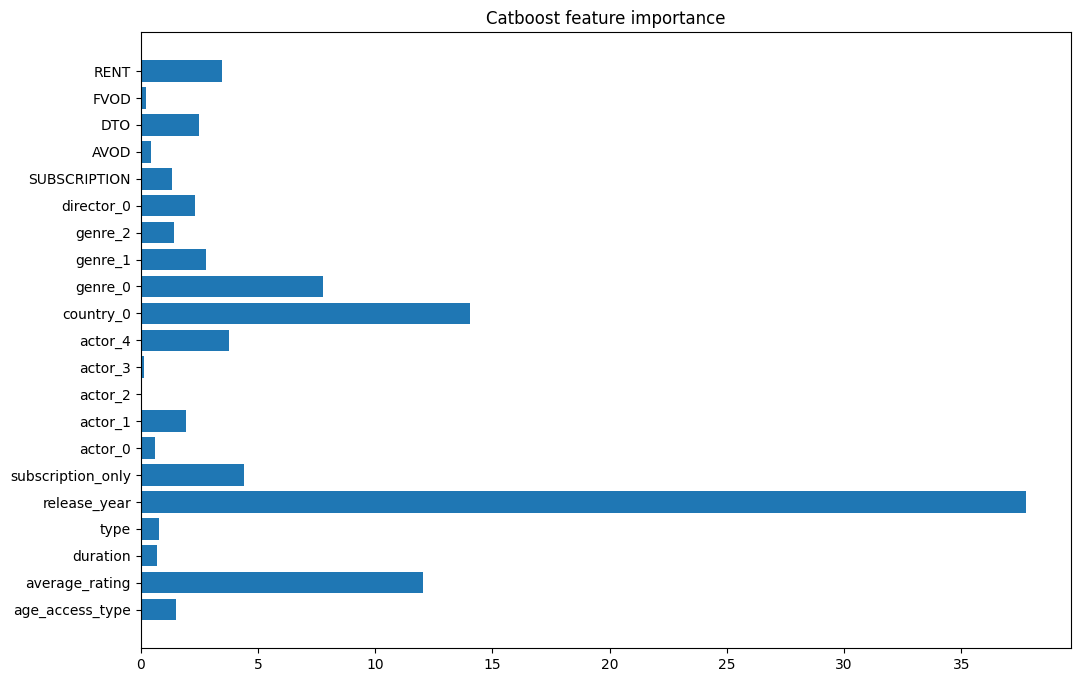

In [291]:
get_importance(train_dataset, cat_model, title='Catboost feature importance', save_fig=False, file_name='cat_feature_importance.png')

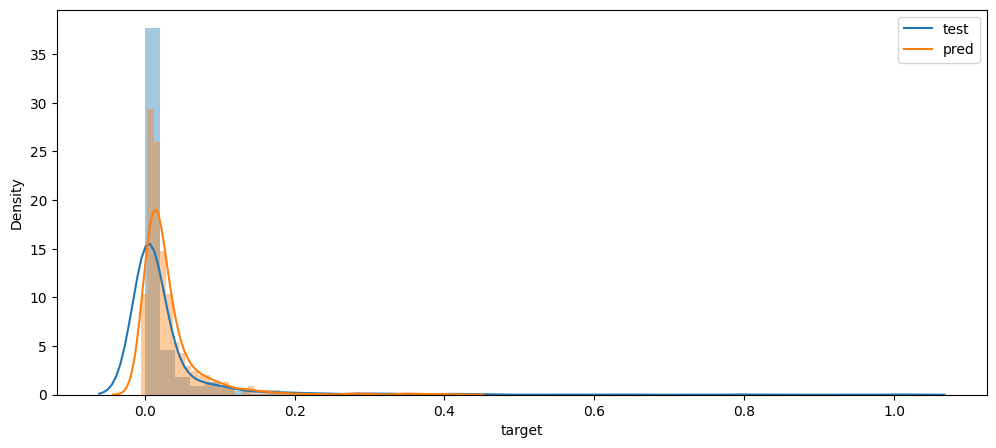

In [301]:
draw_target_distr(y_test, y_pred, save_fig=False, file_name='cat_distribution')

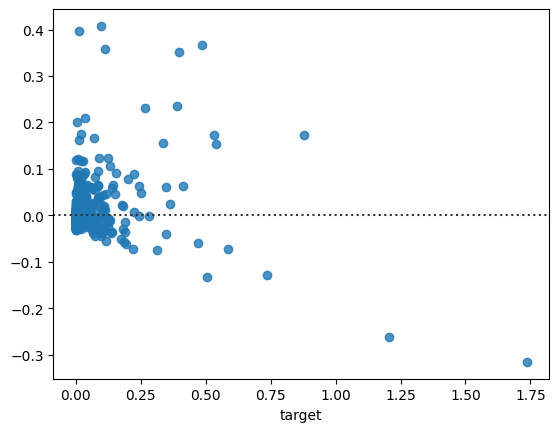

In [308]:
draw_residuals(y_test, y_pred, save_fig=False)

In [294]:
len(y_pred[y_pred <= 0])

22

## Tuning

In [ ]:
cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

train_dataset = cat.Pool(X_train, y_train,
                         cat_features=cat_features,
                         
                        ) 

In [ ]:
parameters_distr = {'depth': randint(5, 10),
                    'learning_rate': uniform(0.01, 0.1),
                    'iterations': [5000, 10000, 15000],
                    'l2_leaf_reg':  uniform(0.01, 0.5)
                     }

cat_model = cat.CatBoostRegressor(**cat_params)
grid = RandomizedSearchCV(estimator=cat_model, param_distributions=parameters_distr, 
                          cv=3, n_jobs=-1, verbose=2)

grid.fit(X_train, y_train)

cat_model = grid.best_estimator_
cat_model.save_model('views_0_finetuned_cat')

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/catboost/core.py:1325: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight,
/opt/conda/lib/python3.10/site-packages/catboost/core.py:1325: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight,
/opt/conda/lib/python3.10/site-packages/catboost/core.py:1325: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight,
/opt/conda/lib/python3.10/site-packages/catboost/core.py:1325: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, emb

0:	learn: 0.0405673	total: 116ms	remaining: 28m 59s
1:	learn: 0.0403087	total: 248ms	remaining: 31m 3s
2:	learn: 0.0400899	total: 362ms	remaining: 30m 10s
3:	learn: 0.0398467	total: 466ms	remaining: 29m 8s
4:	learn: 0.0396212	total: 784ms	remaining: 39m 11s
5:	learn: 0.0393485	total: 979ms	remaining: 40m 46s
6:	learn: 0.0391227	total: 1.36s	remaining: 48m 41s
7:	learn: 0.0389189	total: 1.57s	remaining: 49m 12s
8:	learn: 0.0386855	total: 1.74s	remaining: 48m 20s
9:	learn: 0.0384634	total: 2s	remaining: 50m 1s
10:	learn: 0.0382386	total: 2.31s	remaining: 52m 25s
11:	learn: 0.0380064	total: 2.78s	remaining: 57m 51s
12:	learn: 0.0378030	total: 3.11s	remaining: 59m 49s
13:	learn: 0.0376474	total: 3.98s	remaining: 1h 11m 5s
14:	learn: 0.0374766	total: 4.75s	remaining: 1h 19m 5s
15:	learn: 0.0372934	total: 5.18s	remaining: 1h 20m 52s
16:	learn: 0.0371565	total: 5.7s	remaining: 1h 23m 46s
17:	learn: 0.0369745	total: 6.22s	remaining: 1h 26m 19s
18:	learn: 0.0368520	total: 6.89s	remaining: 1h 30

In [336]:
cat_model = grid.best_estimator_

In [335]:
grid.best_params_

{'depth': 7,
 'iterations': 1000,
 'l2_leaf_reg': 0.4741523986764684,
 'learning_rate': 0.03353764113975911}

In [337]:
y_pred = cat_model.predict(X_test)

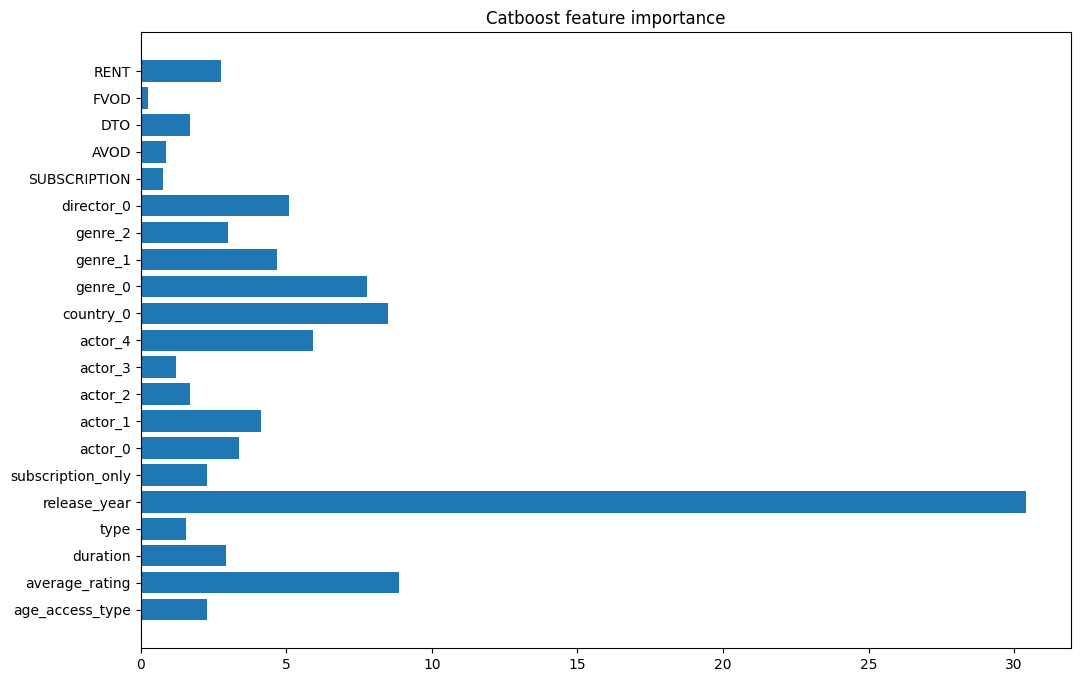

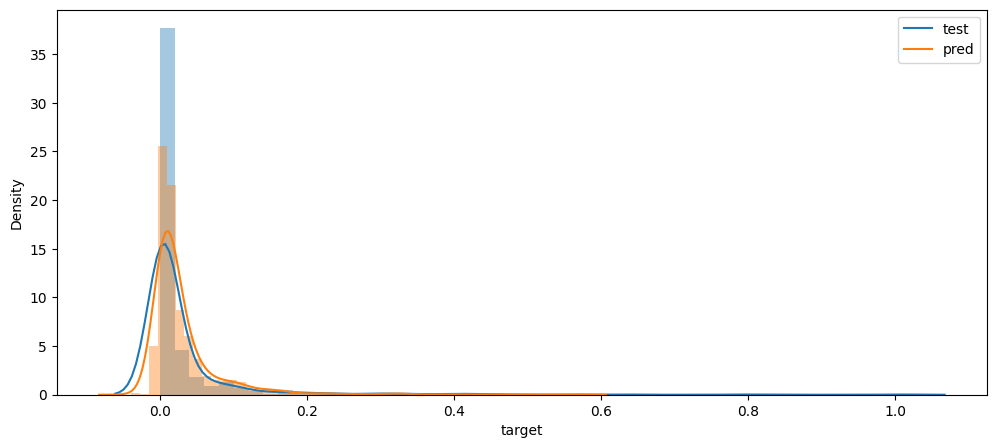

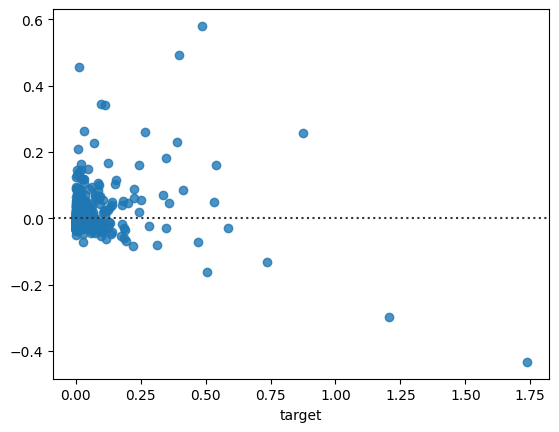

MAE 0.03239158378664328
R2 0.24055036453377243
Adj R2 0.23898295005271186


In [338]:
get_importance(train_dataset, cat_model, title='Catboost feature importance', save_fig=False, file_name='cat_feature_importance.png')
draw_target_distr(y_test, y_pred, save_fig=False, file_name='cat_distribution')
draw_residuals(y_test, y_pred, save_fig=False)
get_metrics(y_test, y_pred, X)

In [340]:
len(y_pred[y_pred <= 0])

99